In [1]:
import os 
import geopandas as gpd
import pandas as pd
import rasterio
from osgeo import gdal
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from rasterio.plot import show,show_hist
import glob

In [2]:
os.chdir("/home/jovyan/MSC_Thesis/MSc_Thesis_2023")

In [22]:
# patch_files_path = 'Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/'
# patch_files = glob.glob(patch_files_path+"*.tif")

sent = rasterio.open("Input/sentinel/2016_Iowa_july/sentinel_masked_2016.tif")

In [23]:
sent.read().shape

(12, 5800, 12059)

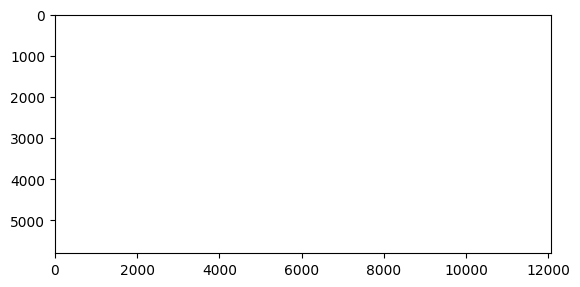

<AxesSubplot: >

In [25]:
show(sent.read(8),cmap="Greens")

<AxesSubplot: >

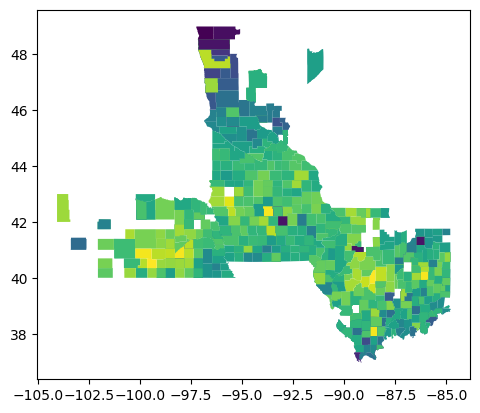

In [8]:
yield_val = gpd.read_file("Output/yield_val/yield_2016.shp")
yield_val.plot(column='Value')

In [104]:
# def get_ndvi_patch(patch_src):
#     smin=0 
#     smax=255
    
#     x = patch_src.read(8) #NIR Band
#     bandNIR = ( x - np.nanmin(x) ) * (smax - smin) / ( np.nanmax(x) - np.nanmin(x) ) + smin
#     y = patch_src.read(4) #Red Band
#     bandRed = ( y - np.nanmin(y) ) * (smax - smin) / ( np.nanmax(y) - np.nanmin(y) ) + smin
#     ndvi = np.zeros(patch_src.read(1).shape, dtype=rasterio.float32)
#     ndvi = ((bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float)))
#     avg_ndvi = np.nanmean(ndvi)
#     min_ndvi = np.nanmin(ndvi)
#     max_ndvi = np.nanmax(ndvi)
#     return avg_ndvi,min_ndvi,max_ndvi


Check Red and NIR band value correction for proper computation of NDVi

In [102]:
# for i_patch in patch_files:
#     print(i_patch)
#     patch_src = rasterio.open(i_patch)
#     avg_ndvi,min_ndvi,max_ndvi = get_ndvi_patch(patch_src)
#     print(avg_ndvi,min_ndvi,max_ndvi)
#     break

Input/sentinel/2021/sent2_2021_Iowa_60m/Iowa_masked_patches/sentinel_5632-1536.tif
-0.2445836970281596 -1.0 1.0


(341, 7)


<AxesSubplot: xlabel='yld_kg_sqm'>

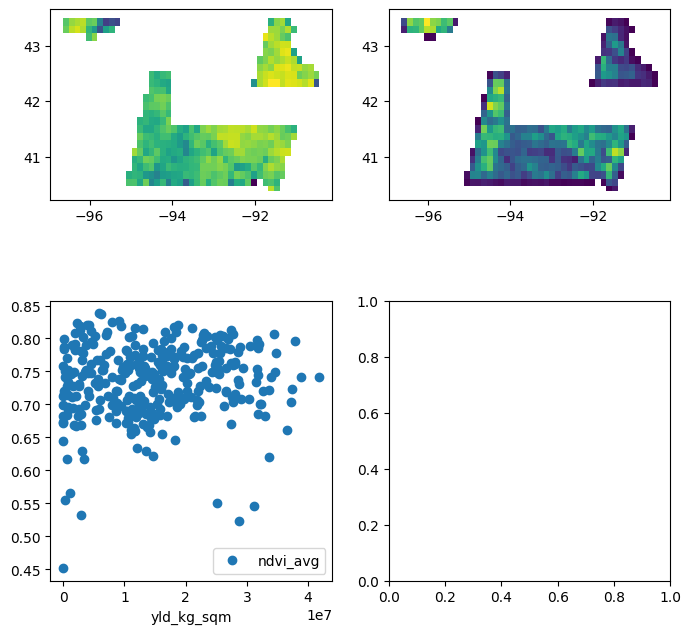

In [27]:
target = gpd.read_file("Input/Target/Iowa2016.shp")
print(target.shape)
fig,ax = plt.subplots(2,2,figsize=(8,8))
# target.hist(ax=ax[0,0],bins=30)
target.plot(column="ndvi_avg",ax=ax[0,0])
target.plot(column="yld_kg_sqm",ax=ax[0,1])
target_df = pd.DataFrame(target)
target_df.plot(x='yld_kg_sqm', y='ndvi_avg',ax=ax[1,0], style='o')

(811, 7)


<AxesSubplot: xlabel='yld_kg_sqm'>

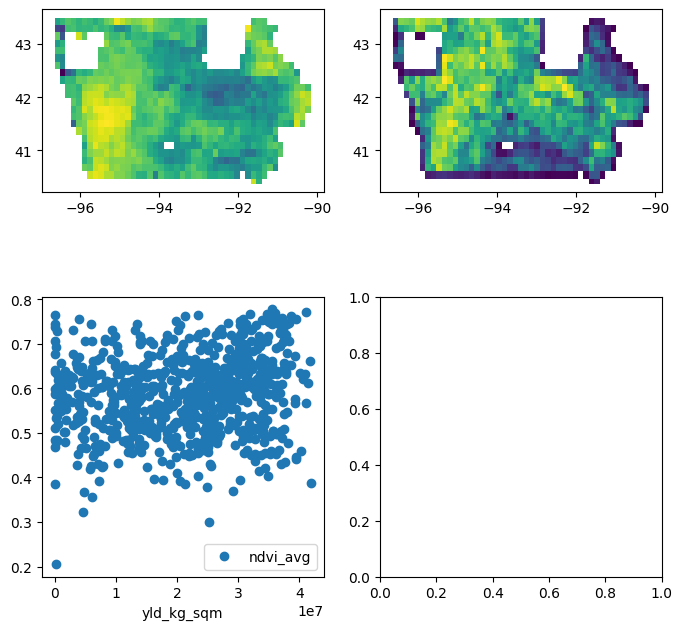

In [28]:
target = gpd.read_file("Input/Target/Iowa2017.shp")
print(target.shape)
fig,ax = plt.subplots(2,2,figsize=(8,8))
# target.hist(ax=ax[0,0],bins=30)
target.plot(column="ndvi_avg",ax=ax[0,0])
target.plot(column="yld_kg_sqm",ax=ax[0,1])
target_df = pd.DataFrame(target)
target_df.plot(x='yld_kg_sqm', y='ndvi_avg',ax=ax[1,0], style='o')

(866, 7)


<AxesSubplot: xlabel='yld_kg_sqm'>

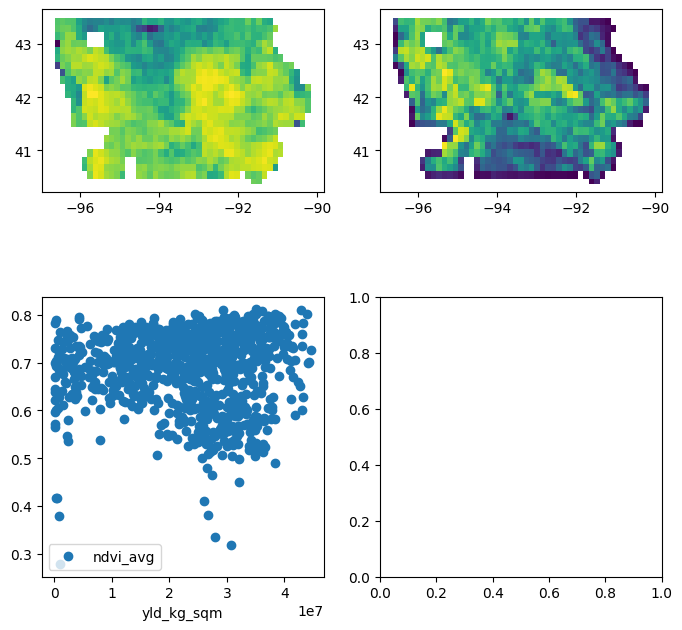

In [29]:
target = gpd.read_file("Input/Target/Iowa2018.shp")
print(target.shape)
fig,ax = plt.subplots(2,2,figsize=(8,8))
# target.hist(ax=ax[0,0],bins=30)
target.plot(column="ndvi_avg",ax=ax[0,0])
target.plot(column="yld_kg_sqm",ax=ax[0,1])
target_df = pd.DataFrame(target)
target_df.plot(x='yld_kg_sqm', y='ndvi_avg',ax=ax[1,0], style='o')

(790, 7)


<AxesSubplot: xlabel='yld_kg_sqm'>

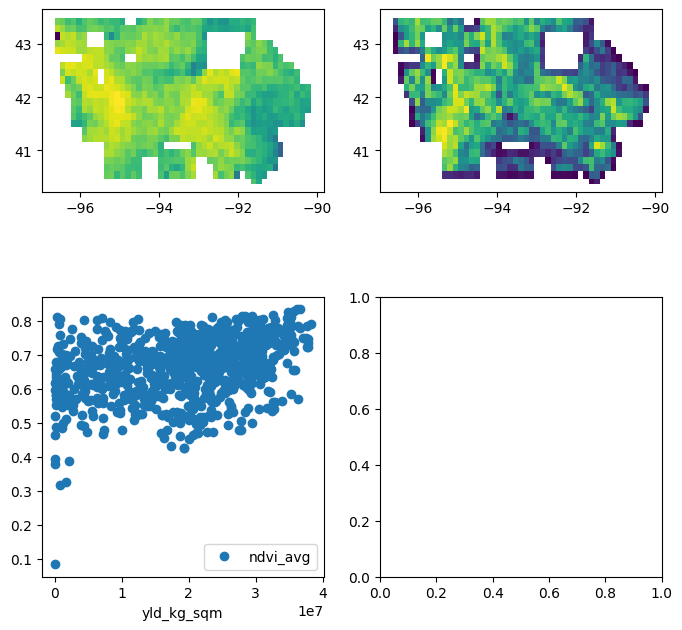

In [30]:
target = gpd.read_file("Input/Target/Iowa2019.shp")
print(target.shape)
fig,ax = plt.subplots(2,2,figsize=(8,8))
# target.hist(ax=ax[0,0],bins=30)
target.plot(column="ndvi_avg",ax=ax[0,0])
target.plot(column="yld_kg_sqm",ax=ax[0,1])
target_df = pd.DataFrame(target)
target_df.plot(x='yld_kg_sqm', y='ndvi_avg',ax=ax[1,0], style='o')

(824, 7)


<AxesSubplot: xlabel='yld_kg_sqm'>

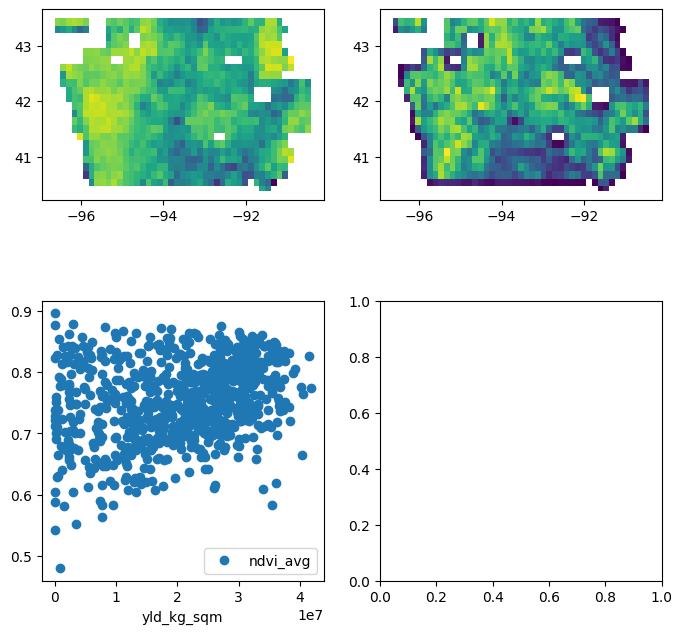

In [31]:
target = gpd.read_file("Input/Target/Iowa2020.shp")
print(target.shape)
fig,ax = plt.subplots(2,2,figsize=(8,8))
# target.hist(ax=ax[0,0],bins=30)
target.plot(column="ndvi_avg",ax=ax[0,0])
target.plot(column="yld_kg_sqm",ax=ax[0,1])
target_df = pd.DataFrame(target)
target_df.plot(x='yld_kg_sqm', y='ndvi_avg',ax=ax[1,0], style='o')

(707, 7)


<AxesSubplot: xlabel='yld_kg_sqm'>

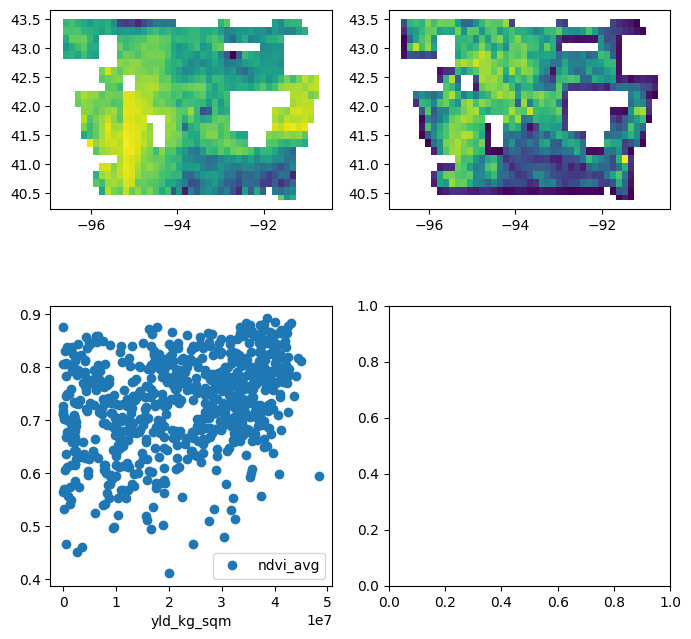

In [32]:
target = gpd.read_file("Input/Target/Iowa2021.shp")
print(target.shape)
fig,ax = plt.subplots(2,2,figsize=(8,8))
# target.hist(ax=ax[0,0],bins=30)
target.plot(column="ndvi_avg",ax=ax[0,0])
target.plot(column="yld_kg_sqm",ax=ax[0,1])
target_df = pd.DataFrame(target)
target_df.plot(x='yld_kg_sqm', y='ndvi_avg',ax=ax[1,0], style='o')

In [36]:
shape_files = glob.glob("Input/Target/*.shp")
gdf_list = [gpd.read_file(i) for i in shape_files]
target_concat = gpd.GeoDataFrame( pd.concat( gdf_list, ignore_index=True) )

In [41]:
target_concat

,patch_name,year,yld_kg_sqm,ndvi_avg,ndvi_max,ndvi_min,geometry
0,Iowa_2016_july_8192-3840,2016,1.807300e+07,0.768418,0.868922,0.148299,"POLYGON ((-92.08630 41.29358, -92.22428 41.293..."
1,Iowa_2016_july_9728-1280,2016,4.869040e+06,0.791260,0.875368,0.240375,"POLYGON ((-91.25841 42.67339, -91.39639 42.673..."
2,Iowa_2016_july_10240-3840,2016,7.649977e+04,0.784352,0.838680,0.660690,"POLYGON ((-90.98245 41.29358, -91.12043 41.293..."
3,Iowa_2016_july_8448-4864,2016,9.177180e+06,0.738453,0.868109,0.096842,"POLYGON ((-91.94832 40.74165, -92.08630 40.741..."
4,Iowa_2016_july_8704-1536,2016,1.082448e+07,0.771742,0.875917,0.334064,"POLYGON ((-91.81034 42.53541, -91.94832 42.535..."
...,...,...,...,...,...,...,...
4334,Iowa_2020_july_7424-2560,2020,2.574459e+07,0.696640,0.939274,0.084764,"POLYGON ((-92.50024 41.98348, -92.63822 41.983..."
4335,Iowa_2020_july_10240-3072,2020,3.253135e+07,0.762215,0.930812,0.145916,"POLYGON ((-90.98245 41.70752, -91.12043 41.707..."
4336,Iowa_2020_july_9472-512,2020,1.375521e+07,0.831313,0.935484,0.291871,"POLYGON ((-91.39639 43.08733, -91.53437 43.087..."
4337,Iowa_2020_july_9728-4608,2020,2.935687e+07,0.767159,0.937702,0.124582,"POLYGON ((-91.25841 40.87963, -91.39639 40.879..."


In [44]:
target_concat.corr()

,year,yld_kg_sqm,ndvi_avg,ndvi_max,ndvi_min
year,1.000000,0.079485,0.346781,0.599828,0.028907
yld_kg_sqm,0.079485,1.000000,0.154605,0.130645,-0.296059
ndvi_avg,0.346781,0.154605,1.000000,0.528702,0.153277
ndvi_max,0.599828,0.130645,0.528702,1.000000,-0.164487
ndvi_min,0.028907,-0.296059,0.153277,-0.164487,1.000000


<AxesSubplot: xlabel='yld_kg_sqm'>

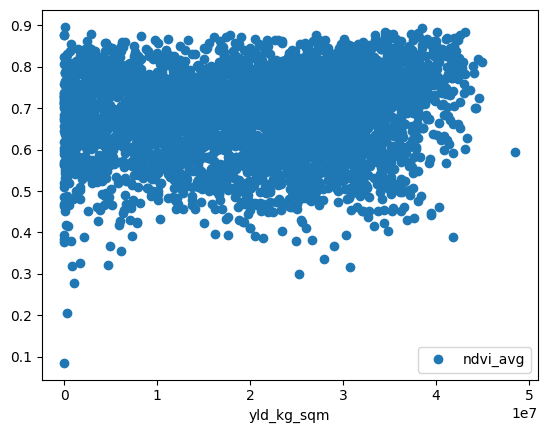

In [42]:
target_df = pd.DataFrame(target_concat)
target_df.plot(x='yld_kg_sqm', y='ndvi_avg',style='o')